<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETOS/blob/master/ANALISE_DE_CREDITO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AVALIAÇÃO DE RISCOS DE CRÉDITO

A análise de risco de crédito é um método eficaz na hora de avaliar possíveis inadimplências por parte de potenciais clientes. Através de uma base de dados, a sua empresa pode identificar como determinado cliente lida com seu crédito, prevendo eventuais negócios arriscados.

Mas como identificar um cliente devedor antes de fechar contratos e qual a importância disso para o meu negócio?


Geralmente, esse tipo de análise é feita por empresas que possuem acesso a banco de dados. Um dos mais populares, por exemplo, é o SERASA Score, que disponibiliza às empresas a pontuação dos consumidores no sistema de crédito do País.

Se o consumidor possui histórico de não pagar a fatura do cartão, por exemplo, quais as chances de a sua empresa ficar no prejuízo ao fechar contratos com essa pessoa física? Tudo isso é possível checar pelo SERASA.

No entanto, ainda é possível fazer a conferência manual através dos documentos do consumidor, de referências e histórico de compra em empresas do ramo. Mas há empresas que oferecem o serviço de análise de risco de crédito de forma mais rápida e informatizada.

Como funciona a gestão e análise de risco de crédito?
Já imaginou que você talvez possa prever riscos de inadimplência por parte do seu cliente? E você pode, já que através da gestão e análise de risco de crédito você controla para quem concede o crédito, como escolhe as pessoas a quem você concede esse crédito e também monitora as condições desse cliente de pagar a dívida ou não.

Isso é uma questão essencial para as empresas que possuem um sistema de crediário próprio.

A gestão de risco de crédito é responsável por:

classificar os perfis de clientes: analisar se determinadas solicitações de crédito são seguras;
definir limites de crédito: até quanto sua empresa pode dar de crédito sem ter prejuízo?; e
atualizar esses limites: tanto para mais, quanto para menos, afinal, é normal que as finanças oscilem.
A tecnologia cumpre um papel muito importante aqui. É através de bancos de dados e softwares de gestão que os processos de gestão e análise de risco são consultados.

Imagine que você tenha que consultar o perfil de cada cliente de maneira manual? O processo seria bem mais demorado e a liberação de crédito demoraria muito mais também.



CONTEXTUALIZAÇÃO DO PROBLEMA

* Neste problema, o objetivo é rever qual a probabilidade de um cliente da Startup Nubank não cumprur com suas obrigações financieras e deixar de pagar a sua fatura de cartão de crédito.

Importar os Dados



*Os dados que serão utilizado consistem basicamente em um arquivo CSV contendo 45.000 linhas e 43 colunas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Definir o estilo do seaborn par aos plot
sns.set_style()

from sklearn.impute import SimpleImputer #Utilizando para cobrir os valores nulos, tratar os valores ausentes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/DATA_SCIENCE-NA_PRATICA/Datasets/datasets/Nubank_acquisition_train.csv')

Analise Exploratória de Dados

   * Esta etapa consiste em entender como os dados estão estruturados, os tipos de dados que compõe o dataset e etc.

In [3]:
print('DIMENSÕES DO DATAFRAME')
print('Linhas:\t\t{}'.format(df.shape[0]))
print('Colunas:\t{}'.format(df.shape[1]))

DIMENSÕES DO DATAFRAME
Linhas:		45000
Colunas:	43


In [4]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


A partir do dataframe das features é possível concluir que:

* A coluna ID, anônima que representa um identificador únic d cliente. Iremos eliminar esta coluna mais a frente, pois ela não contém nenhuma informação relevante.

* A coluna target_default é a variável alvo do problema. Vale destacar que possui alguns valores ausentes que deverão ser excluídos do dataset;

* A coluna target_fraud é uma variável alvo destinada para avaliar a possibilidade de fraude no cartão de crédito. Como não é objeto deste estudo, esta coluna será excluída do dataset;

* As variáveis last_amount_borrowed, last_borrowed_in_months, ok_since e external_data_provider_credit_checks_last_2_year possuem mais de 50% do dataset de valores ausentes, sendo difícil substituir tais valores, podendo gerar erros durante a predição. Portanto, estas colunas serão excluídas;

* As variáveis job_name, external_data_provider_first_name, profile_phone_number e zip são do tipo string e possuem muitos valores categóricos distintos, difíceis de serem agrupados, portanto estas colunas serão excluídas;

* A variável 
external_data_provider_email_seen_before possui um valor mínimo em -999, provavelmente este campo recebeu este valor, porque o sistema de cadastro não permitia valores nulos para preenchimento. Portanto, estes valores serão considerados como NaN;

* A variável reported_income possui um valor máximo de infinito, portanto, este valor será substituído por NaN;

* A variável credit_limit possui um mínimo de 0 reais, não é uma prática do mercado de cartão de crédito liberar apenas 0 reais de limite. Portanto, este valor será substituído por NaN;

* Criaremos uma variável de agrupamento por região do Brasil, utilizando a variável shipping_state;

* A variável ids serve para identificar um determinado cliente, portanto, não agrega valor no objetivo proposto e esta coluna será excluída;

* A variável channel apenas tem um valor único, portanto, não agrega valor a análise e será excluída;

* As variáveis lat_lon e shipping_zip_code serão excluídas do dataset para simplificar a modelagem.

Especificação de Cada Variável

In [5]:
#Criar um dicionario 

def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append(round(df[feature].isnull().sum() / df.shape[0],4))

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Atribuindo o valor 0 se a variável não for binária
      dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var


Criando um Dataframe com as Caracteristicas

In [6]:
#Armazenando as features

features = df.columns.to_list()

#Armazenando as informações das Variáveis

df_var = Map_Var_DF(features= features, df = df)

#Imprimindo o Dataframe

df_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,ids,object,1,0,45000,N/A,N/A,0.0000
1,target_default,object,1,1,2,N/A,N/A,0.0724
2,score_1,object,1,0,7,N/A,N/A,0.0125
3,score_2,object,1,0,35,N/A,N/A,0.0125
4,score_3,float64,0,0,88,0,990,0.0125
5,score_4,float64,0,0,45000,86.1916,113.978,0.0000
6,score_5,float64,0,0,45000,3.54358e-05,0.999973,0.0000
7,score_6,float64,0,0,45000,60.663,142.192,0.0000
8,risk_rate,float64,0,0,82,0,0.9,0.0125
9,last_amount_borrowed,float64,0,0,14325,1005.18,35059.6,0.6657


A partir do dataframe das features é possível concluir que:

* A coluna target_default é a variável alvo do problema. Vale destacar que possui alguns valores ausentes que deverão ser excluídos do dataset;

* A coluna target_fraud é uma variável alvo destinada para avaliar a possibilidade de fraude no cartão de crédito. Como não é objeto deste estudo, esta coluna será excluída do dataset;

* As variáveis last_amount_borrowed, last_borrowed_in_months, ok_since e external_data_provider_credit_checks_last_2_year possuem mais de 50% do dataset de valores ausentes, sendo difícil substituir tais valores, podendo gerar erros durante a predição. Portanto, estas colunas serão excluídas;

* As variáveis job_name, external_data_provider_first_name, profile_phone_number e zip são do tipo string e possuem muitos valores categóricos distintos, difíceis de serem agrupados, portanto estas colunas serão excluídas;

* A variável external_data_provider_email_seen_before possui um valor mínimo em -999, provavelmente este campo recebeu este valor, porque o sistema de cadastro não permitia valores nulos para preenchimento. Portanto, estes valores serão considerados como NaN;

* A variável reported_income possui um valor máximo de infinito, portanto, este valor será substituído por NaN;

* A variável credit_limit possui um mínimo de 0 reais, não é uma prática do mercado de cartão de crédito liberar apenas 0 reais de limite. Portanto, este valor será substituído por NaN;

* Criaremos uma variável de agrupamento por região do Brasil, utilizando a variável shipping_state;

* A variável ids serve para identificar um determinado cliente, portanto, não agrega valor no objetivo proposto e esta coluna será excluída;

* A variável channel apenas tem um valor único, portanto, não agrega valor a análise e será excluída;

* As variáveis lat_lon e shipping_zip_code serão excluídas do dataset para simplificar a modelagem.

Ver o Resumo Estatístico dos doados numéricos

In [7]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Olhando o resumo das principais informações estatísticas capazes de destacar algumas informações

* A coluna external-external_data_provider_credit_checks_last_2_year possui valores minimos, máximos e desvio padrão iguais a zero.

* A coluna reported_income apresenta valores inf, que irão interferir  na análise e model. Substituir do tipo np.inf por np.nan para trabalhar com os dados.

* A coluna external_data_provider_email_seen_before apresenta o valor minimo de -999 o que ao se considerar as outrar informações. Após verificar de maneira mais aprofundada, chegou-se a conclusão que esse dados 
são outliers ou foram tratados inadequadamente.
  Substituiremos os valores iguais a -999 por np.nan. 

In [8]:
#Tipos de variaveis 

print('\nTipos de Variáveis')
print(df.dtypes)


Tipos de Variáveis
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                 

VALORES AUSENTES

In [9]:
print('\nVALORES AUSENTES')
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defa

Exsite muitos dados faltantes, esses dados passa de 50% do dataset. Devemos tratar esses dados faltantes.

VALORES UNICOS

In [10]:
print('\nVALORES UNICOS')
print(df.nunique().sort_values())



VALORES UNICOS
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               4

A contagem de valores únicos mostra que as colunas external_data_provider_credit_checks_last_2_year e chanel apresenta um unico valor
possível. Como não ha maiores informações sobre cada feature iremos descartar as duas colunas para o modelo 
 de Machine Learning.
 Também se percebe que profile_phone_number possui 45 mil únicos valores, não trazendo provalvemente nenhuma informação  que poss com a análise.

PROPORÇÃO ENTRE INADIMPLENTES NO DATASET

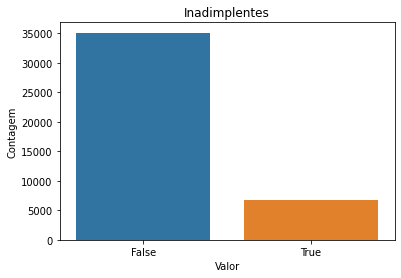

Proporção entre Inadimplentes no Dataset
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [11]:
fig, ax = plt.subplots()
sns.countplot('target_default', data=df, ax=ax)
ax.set_title('Inadimplentes')
ax.set_xlabel('Valor')
ax.set_ylabel('Contagem')
plt.show();

print("Proporção entre Inadimplentes no Dataset")
print(df['target_default'].value_counts() / df.shape[0])

PREPARAÇÃO DOS DADOS

In [12]:
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [13]:
#fazer uma copia do dataset
df_clean = df.copy()
#substituir inf por nan em reported_income

df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

#descrtar as colunas ids, target_fraud
#external_data_provid_creditchecks_2_year e channel 

df_clean.drop(labels = ['ids','target_fraud',
                        'external_data_provider_credit_checks_last_2_year',
                        'channel'], axis=1, inplace=True)

#Substituir -999 em external_data_provider_email_seem_before por NaN

df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

#Eliminar colunas sem informação aparente ou que demandam mais pesquisas

drop_var = ['reason','zip','job_name','external_data_provider_first_name',
            'lat_lon','shipping_zip_code', 'user_agent','profile_tags',
            'application_time_applied','email','marketing_channel',
            'profile_phone_number','shipping_state']

df_clean.drop(labels=drop_var, axis=1, inplace=True)

#Eliminar as entradas onde target_default e NaN
df_clean.dropna(subset=['target_default'], inplace=True)


Apesar de não haver maiores informações sobre as features, podemos assumir como premissas qye muitos valores são 
nulos devidos a os dois fatores
* 1 - há algums itens que não são obrigatorios durante a etapa de preenchimeto dos formularios como a informção sobre o perfil do cliene

* 2 Não existe observação alguma ã coluna como é caso das colunas['las_a,ount_boroowed', 'last_borrowed', 'n_issues'

De  maneira geral, para as variabes que se enquadram n segundo caso, os valores NaN seão substituidos por zero. Para as variaveis númericos
sera adotado o valor da mediana, e para as cateforicas o valor mais frequente.

PREENCHER OS VALORES NULOS

In [14]:
num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

In [15]:
#Substituição de valores ausentes

df_clean.last_amount_borrowed.fillna(value=0, inplace= True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace= True)

In [16]:
#Variaveis númericas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:, num_df])
df_clean.loc[:, num_df] = imputer.transform(df_clean.loc[:,num_df])


In [17]:
#Variaveis Categoricas

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:, cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

-------------

VERIFICAR SE TEM VALORES NULOS

In [18]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

Todos os valores nulos fora preenchidos.

-----------------------------

Para Melhoraro desempenho do modelo, vamos normalizar as variaveus númericas usadno o StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
scaled_df = df_clean.copy()
#NOrmalizar as colunas numéricas
num_cols = scaled_df.drop('target_default',
                          axis=1).select_dtypes(exclude='object').columns
scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)                          

In [21]:
scaled_df.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,sjJbkqJS7cXalHLBFA+EOQ==,N5/CE7lSkAfB04hVFFwllw==,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.444809,-1.427247,1.322812,0.501783,-0.040691
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,xsd3ZdsI3356I3xMxZeiqQ==,N5/CE7lSkAfB04hVFFwllw==,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,-0.452701,-1.427247,-0.635622,-0.894101,-0.040691
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,Ygq6MsM98oC8yceExr69Ig==,n+xK9CfX0bCn77lClTWviw==,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.444809,0.700650,-1.096430,-1.512178,-0.040691
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,KET/Pmr6rHp1RJ/P9ymztw==,n+xK9CfX0bCn77lClTWviw==,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,1.342319,0.700650,0.573999,1.092082,-0.040691
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.444809,0.700650,1.034807,-0.626730,-0.040691


Trabalhar os textos;

Continuando com a preparaçãodos daods, irei realizar label Encoding par apossibilitar as variaveis categoricas possam ser codificadas em format de labels e alimentar o modelo de Machine Learning

In [22]:
encoded_df = scaled_df.copy()
#Extrair as colunas categoricas
cat_cols = encoded_df.select_dtypes('object').columns

#codificar cada coluna categoricas

for col in cat_cols:
  encoded_df[col + '_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace= True)

In [23]:
encoded_df.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.444809,-1.427247,1.322812,0.501783,-0.040691,0,10,44,1
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,-0.452701,-1.427247,-0.635622,-0.894101,-0.040691,3,16,47,1
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.444809,0.700650,-1.096430,-1.512178,-0.040691,3,9,32,3
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,1.342319,0.700650,0.573999,1.092082,-0.040691,0,21,23,3
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.444809,0.700650,1.034807,-0.626730,-0.040691,2,1,47,3


Tiramos todas aquela string que não estava com o planejamento.

DIVIDIR EM TREINO E TESTE

Por fim, irei separar a variavel alvo das demais e dividir o dataset entre dados de treino e teste com a função train_test_split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Separar as variaveis idependentes da variavel alvo 
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

#dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

CONSTRUÇÃO DO MODELO

O XGBOOOST par acontrução do modelo, um avez que este vem se destancando e apresentando bons
resultados em problemas similares a este.
Não foi realizado uma analise mais aprofundada sobre as variaveis e nem um tunning de parametro, mas construindo um modelo simplres ára servir
de baseline.

Resalta-se que os valores dos parametros do XGBoost também  foram generalista e arbitrarios.


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score

In [28]:
#Instanciando o modelo e treinando o mesmo 

ml_model = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=3, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

Lembrando, que o dataset utilizado neste projeto é desbalanceado(tenho mais informação de um lado do que do outro ), o que pode gerar métricas que não representam 
a realidade da situação problemática do mundo real 

Sem serexaustivo, será apresentada apenas a acurácia do modelo como métricas simples de avaliação.
                                                                                                     

In [29]:
#previsões e probabilidade em cima do dataset de teste

Y_pred = ml_model.predict(X_test)

In [31]:
#Ver performance do algoritmo 

print( '\nAccuracy Score:')
print(accuracy_score(y_test, Y_pred))


Accuracy Score:
0.8387766509622295


-------------

Pode-se assumir a premissa de que este é um problema multiobjsetiva de otimização, onde espera-se tanto a quantidade de false
potives quanto maximizar a quantidade de true posives.

para esta etapa a utilização da métrica a acurácia pode ser estabelecidas a fim de comparação entre diferentes de Machine.

Como ação futura, recomenda-se a utilização de problem Structuring  Method para defiir pesos para cada objetivos individual a fim de 
estabelecer uma função objetia para a modelagem.